<h1 style="text-align:center">Advanced Statistical Inference</h1>
<h1 style="text-align:center">Clustering</h1>

## 1. Aims
<div class="alert alert-info"> 
To implement $k$-means and use it to cluster some data.
</div>

In [394]:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
mat = scipy.io.loadmat('kmeansdata.mat')


In [395]:
X = mat['X']
print(X.shape)

(100, 2)


## 2. Implement the $k$-means algorithm covered in the lecture (not the kernelised version)

<div class="alert alert-info">

Hints:
<br>
<ul> 
<li> Your code needs to alternate between assigning points to the cluster that they’re closest to and recalculating the means by taking the average of these points.
<li> You may need to add something to your code to deal with the problem of no points being assigned to a particular cluster – set the mean randomly.
<li> You’ll find it easiest to maintain a variable that indicates which cluster each point is assigned to. Be careful not to assign a point to more than one cluster.
<li> Your algorithm should converge in fewer than 20 steps (or thereabouts). If it takes 100, something isn’t right!
</ul>

</div>

In [416]:
#HELPER FUNCTIONS

def xs_and_ys(X):
    
    xs=[x[0] for x in X]
    ys=[x[1] for x in X]
    
    return xs,ys




def random_centroids(k,dim=2):
    cents=[]
    for _ in range(k):
        cent=[]
        for _ in range(dim):
            cent.append(np.random.randint(-6,6))
        cents.append(cent)
        
    return np.array(cents)
    

    
def assignment(X,centroids):
    
    assignments=[]
    distances=[]
    
    for x in X:
        distances.append(np.linalg.norm(x-centroids,axis=1))
    
    assignments=np.argmin(distances,axis=1)
    
    return assignments


def update(assignments,X,k):
    
    cents=[]
    
    for i in range(k):
        
        closest_points=np.where(assignments==i)
        if(len(closest_points[0])==0):
            cents.append(random_centroids(1,dim=X.shape[1])[0])
            
        else:
            cents.append(np.mean(X[closest_points],axis=0))
    
    return cents
    
    

    
def plot_kmeans(X,k):
    
    cntrds,assigns=kmeans(X,k)

    x_c,y_c=xs_and_ys(cntrds)
    plt.scatter(x_c,y_c, c='black', s=200, alpha=0.5)

    x,y=xs_and_ys(X)
    plt.scatter(x,y,c=assigns,s=50,cmap='viridis')

    plt.show()

In [413]:
def kmeans(data, k=2, centroids=None):
    
    if(centroids is None):
        centroids=random_centroids(k,data.shape[1])
    i=1
    
    while(1):
        assignments=assignment(X,centroids)
        updated_cents=update(assignments,X,k)
        
        if(np.array_equal(updated_cents,centroids)):
            print("Finished in %d iterations." %i)
            return updated_cents,assignments
        
        centroids=updated_cents
        i+=1
            
        
        
   
    

Finished in 5 iterations.


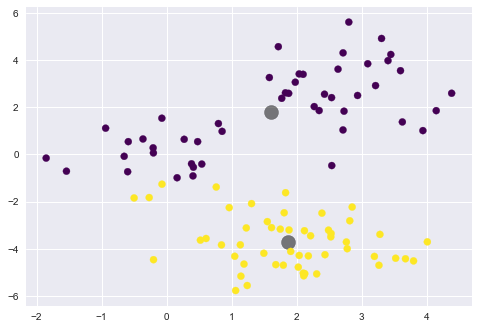

In [417]:
plot_kmeans(X,2)

## 3. Run your algorithm for $k$ = 2, 3, 4 and 5. 

<div class="alert alert-info">
In each case, plot the data using a different symbol for each cluster.
</fiv>

Finished in 12 iterations.


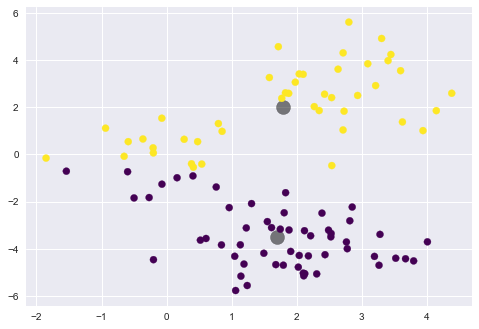

In [418]:
plot_kmeans(X,2)

Finished in 5 iterations.


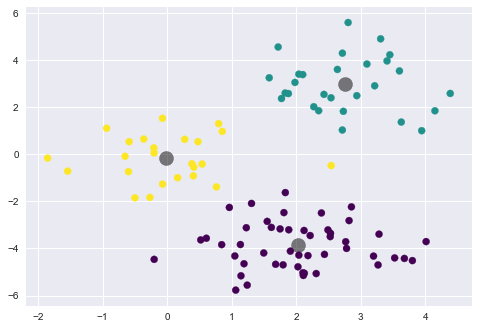

In [419]:
plot_kmeans(X,3)

Finished in 6 iterations.


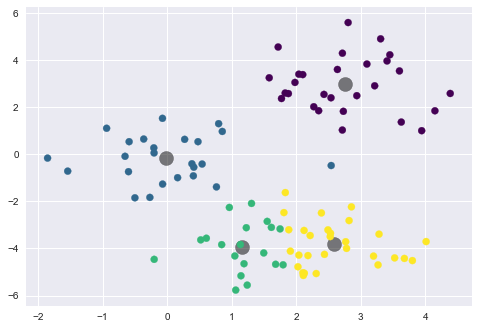

In [420]:
plot_kmeans(X,4)

Finished in 14 iterations.


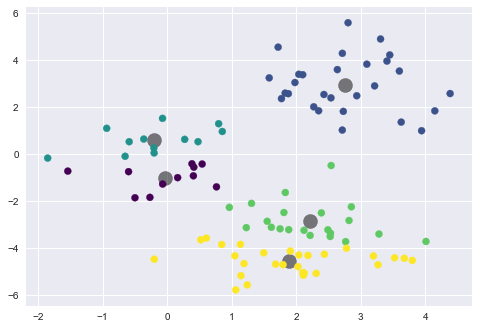

In [421]:
plot_kmeans(X,5)